In [2]:
import pandas as pd
stats = pd.read_csv('stats.csv')
players = pd.read_csv('players.csv')
standings = pd.read_csv('standings.csv')

#getting rid of city and making new country column for analysis later:
players['country'] = players['hometown'].str.split('|').str[0] 

#merging two files made from seperate scrapes on player name, 4 players lost on merge
playerstats = pd.merge(stats,players, on= 'player')

#saving merged file to final csv
playerstats.to_csv('overwatch_player_stats.csv',index=False)

In [3]:
playerstats.head(20)

,player,team,eliminations,deaths,damage,healing,name,hometown,role,country
0,Adora,Hangzhou Spark,16.01,3.88,5390,5678,Jaehwan Kang,South Korea | Changwon,Offense,South Korea
1,Agilities,Los Angeles Valiant,15.94,5.53,6591,6535,Brady Girardi,Canada | Lethbridge,Offense,Canada
2,AimGod,Boston Uprising,13.42,4.69,6721,9486,Minseok Kwon,South Korea | Busan,Support,South Korea
3,aKm,Dallas Fuel,17.30,5.18,9600,158,Dylan Bignet,France | Angoulême,Offense,France
4,alemao,Boston Uprising,8.19,4.99,3918,5662,Renan Moretto,"Brazil | São Caetano do Sul, São Paulo",Support,Brazil
5,ameng,Chengdu Hunters,16.48,6.21,7051,0,Menghan Ding,China | Henan,Tank,China
6,Anamo,New York Excelsior,14.17,2.75,3948,6563,Tae-Sung Jung,South Korea | Pohang,Support,South Korea
7,Architect,San Francisco Shock,18.19,4.56,7825,3806,Minho Park,South Korea | Hongseong,Offense,South Korea
8,ArHaN,Houston Outlaws,9.99,6.40,4640,7131,WonHyeop Jung,South Korea | BUSAN,Offense,South Korea
9,ArK,Washington Justice,7.88,2.65,2482,6825,Yeonjun Hong,South Korea | Seoul,Support,South Korea


In [4]:
teamgroup = playerstats.groupby('team')
teamgroup.size()

team
Atlanta Reign             10
Boston Uprising           10
Chengdu Hunters           10
Dallas Fuel               10
Florida Mayhem             6
Guangzhou Charge          11
Hangzhou Spark            11
Houston Outlaws           10
London Spitfire            6
Los Angeles Gladiators     8
Los Angeles Valiant        8
New York Excelsior         7
Paris Eternal             10
Philadelphia Fusion        9
San Francisco Shock        9
Seoul Dynasty             10
Shanghai Dragons          10
Toronto Defiant            6
Vancouver Titans           9
Washington Justice         5
dtype: int64

In [5]:
team_summary=teamgroup.mean()
team_summary_final = pd.merge(team_summary,standings, on= 'team')
team_summary_final = team_summary_final.round({"eliminations":2, "deaths":2, "damage":1,"healing":1})

In [15]:
team_summary_final['Wins-Losses']=(team_summary_final['wins']-team_summary_final['losses'])
team_summary_final=team_summary_final.sort_values('Wins-Losses', ascending=False)
team_summary_final

,team,eliminations,deaths,damage,healing,wins,losses,Wins-Losses
18,Vancouver Titans,17.23,4.55,6821.0,3819.8,25,3,22
14,San Francisco Shock,17.43,4.47,7259.8,3302.2,23,5,18
11,New York Excelsior,16.92,4.01,6336.1,3183.1,22,6,16
6,Hangzhou Spark,15.01,4.65,6278.5,4158.4,18,10,8
9,Los Angeles Gladiators,15.42,4.70,6921.1,4900.9,17,11,6
0,Atlanta Reign,15.78,5.05,6222.3,2971.2,16,12,4
8,London Spitfire,15.08,4.45,6163.0,4435.2,16,12,4
13,Philadelphia Fusion,14.56,5.17,5830.2,4716.6,15,13,2
5,Guangzhou Charge,14.54,4.38,5529.6,3245.3,15,13,2
15,Seoul Dynasty,15.93,4.23,6324.7,3699.5,15,13,2


In [16]:
team_summary_final.to_csv('overwatch_team_stats.csv',index=False)

In [7]:
from sklearn import datasets
correlations = team_summary_final.corr(method='pearson')['Wins-Losses'][:-1].sort_values(ascending=False)
correlations

wins            1.000000
eliminations    0.849067
damage          0.563145
healing         0.034460
deaths         -0.604933
losses         -1.000000
Name: Wins-Losses, dtype: float64

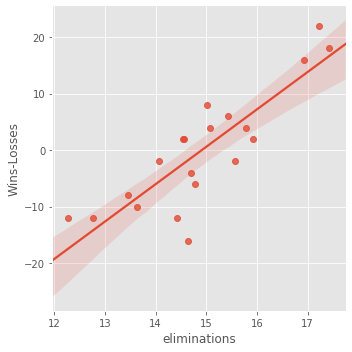

In [104]:
import seaborn as sns
sns.lmplot("eliminations", "Wins-Losses", team_summary_final)

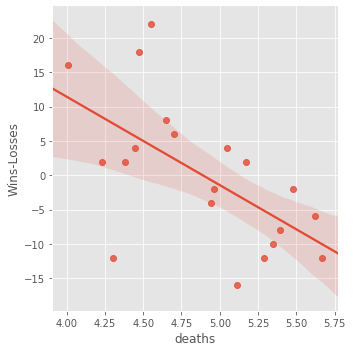

In [106]:
import seaborn as sns
sns.lmplot("deaths", "Wins-Losses", team_summary_final)

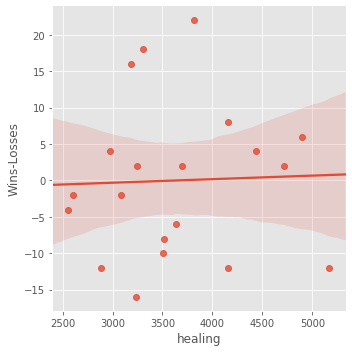

In [107]:
import seaborn as sns
sns.lmplot("healing", "Wins-Losses", team_summary_final)

In [8]:
countrygroup = playerstats.groupby('country')
rolegroup = playerstats.groupby('role')

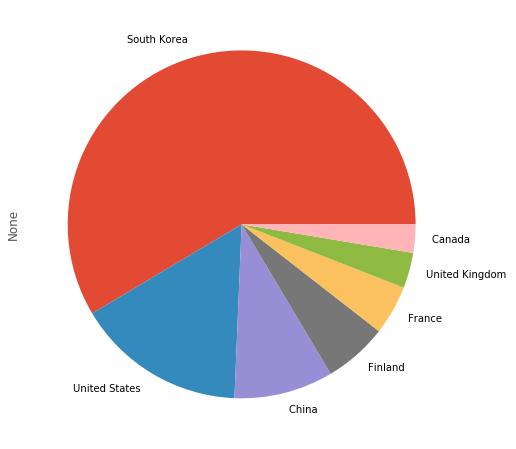

In [99]:
countrypie=countrygroup.size().sort_values(ascending=False)[:7]
countrypie.columns=['country','size']
plot = countrypie.plot.pie(y='size', figsize=(8, 8))


In [10]:
rolegroup.size()

role
Offense    64
Support    58
Tank       53
dtype: int64

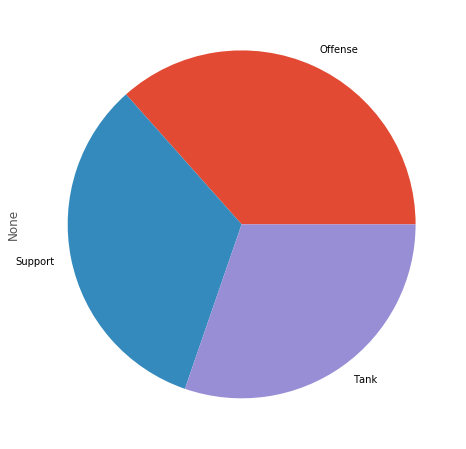

In [102]:
rolepie=rolegroup.size().sort_values(ascending=False)
rolepie.columns=['role','size']
plot = rolepie.plot.pie(y='size', figsize=(8, 8))

In [11]:
rolegroup.mean().round(2)

,eliminations,deaths,damage,healing
role,,,,
Offense,16.39,5.15,7310.16,2614.69
Support,12.10,4.42,4911.69,7813.31
Tank,16.28,5.14,6485.91,193.87


In [12]:
%matplotlib inline

In [37]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)

In [70]:
# Offenseplayers_elims=playerstats.loc[(playerstats["role"]=="Offense")]['eliminations']
# Supportplayers_elims=playerstats.loc[(playerstats["role"]=="Support")]['eliminations']
# Tankplayers_elims=playerstats.loc[(playerstats["role"]=="Tank")]['eliminations']
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import plotly
from plotly.graph_objs import Figure, Histogram, Layout, Bar
plotly.offline.init_notebook_mode(connected=True)


role_elims = playerstats.groupby('role')['eliminations'].mean().sort_values(ascending=False).reset_index()
data = [Bar(x=role_elims['role'], y=role_elims['eliminations'], text=role_elims['role'])]
layout = Layout(title="Average Elimination by Role")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)


In [71]:
role_deaths = playerstats.groupby('role')['deaths'].mean().sort_values(ascending=False).reset_index()
data = [Bar(x=role_deaths['role'], y=role_deaths['deaths'], text=role_deaths['role'])]
layout = Layout(title="Average Deaths by Role")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)

In [72]:
role_damage = playerstats.groupby('role')['damage'].mean().sort_values(ascending=False).reset_index()
data = [Bar(x=role_damage['role'], y=role_damage['damage'], text=role_damage['role'])]
layout = Layout(title="Average Damage by Role")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)

In [77]:
role_healing = playerstats.groupby('role')['healing'].mean().sort_values(ascending=False).reset_index()
data = [Bar(x=role_healing['role'], y=role_healing['healing'], text=role_healing['role'])]
layout = Layout(title="Average Healing by Role")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)